## Automatic styles

**earthkit-plots** can automatically assign pre-configured styles to your data based on metadata, making it quick and easy to produce informative plots without needing to manually define colours, levels, or line styles.

In this notebook, we will explore how automatic styles work with quickplot, `Map`, and various plotting methods, and how you can enable or disable them depending on your needs.

### Automatic Styles with `quickplot`

The `quickplot` method always uses automatic styles if they are available for your data.

Let's load some sample data from ERA5 reanalysis:

In [1]:
import earthkit as ek

data = ek.data.from_source("sample", "era5-2t-msl-1985122512.grib")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,19851225,1200,0,an,0,regular_ll
1,ecmf,msl,surface,0,19851225,1200,0,an,0,regular_ll


Plotting this data with quickplot will use pre-defined styles designed specifically for temperature and pressure:

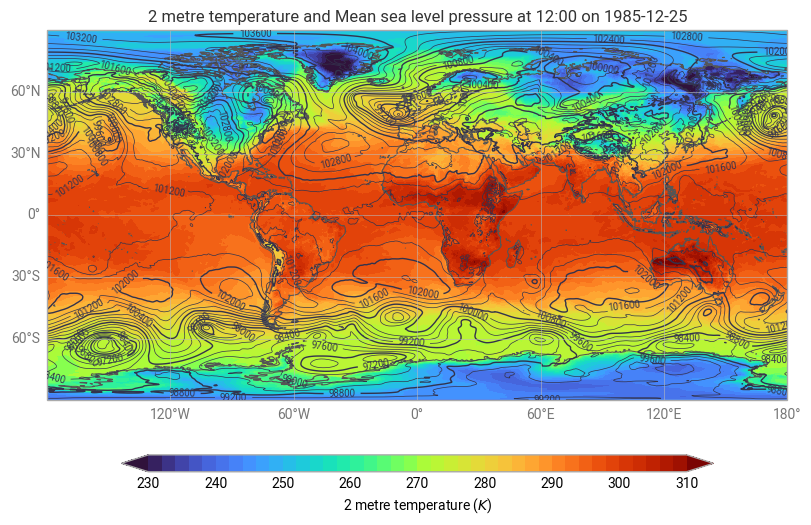

In [2]:
ek.plots.quickplot(data, mode="overlay")

Behind the scenes, **earthkit** has some "preferred units" for many variables. For example, most of the world thinks of temperature in celsius and pressure in hPa. You can switch on the schema option `use_preferred_units` if you would like to let **earthkit** choose some suitable units for you based on the variable:

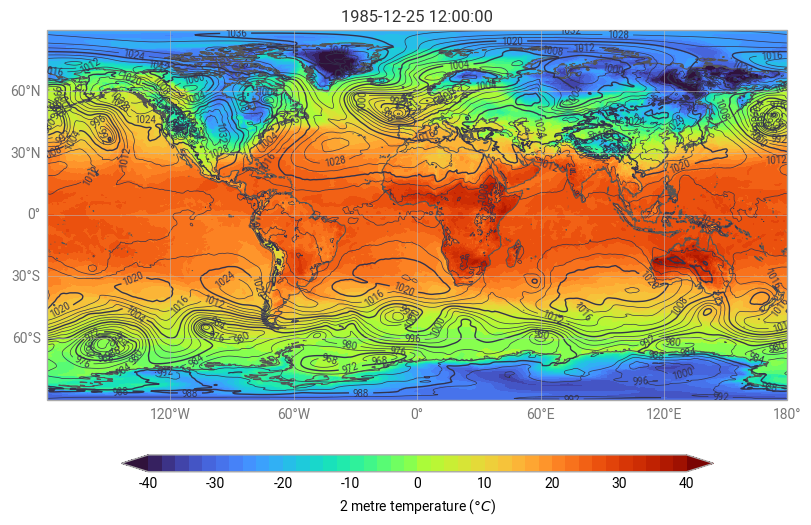

In [3]:
with ek.plots.schema.set(use_preferred_units=True):
    ek.plots.quickplot(data, groupby="time").show()

### Automatic styles on a `Map`

Like the `quickplot` function, the `Map.quickplot` method will always use automatic styles, if available for your data:

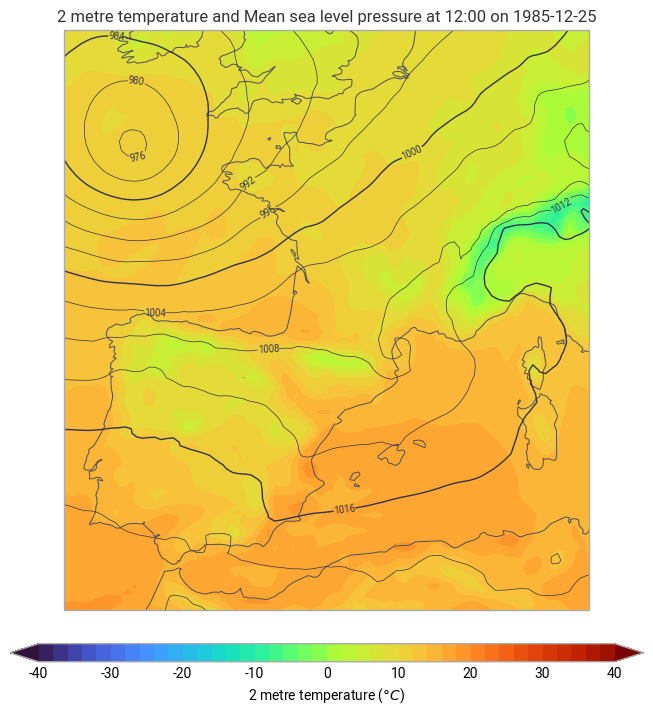

In [4]:
chart = ek.plots.Map(domain=["Spain", "France"])

temperature, pressure = data

chart.quickplot(temperature, units="celsius")
chart.quickplot(pressure, units="hPa")

chart.legend()
chart.title()

chart.coastlines()

chart.show()

More specific plotting functions like `contour`, `contourf`, `grid_cells` and `point_cloud` will  **not use automatic styles by default**, although this is an option. **earthkit-plots** assumes that by using a specific plotting method, you want to style your plot yourself. If you do not pass any style arguments, **earthkit-plots** will fall back to basic default styles:

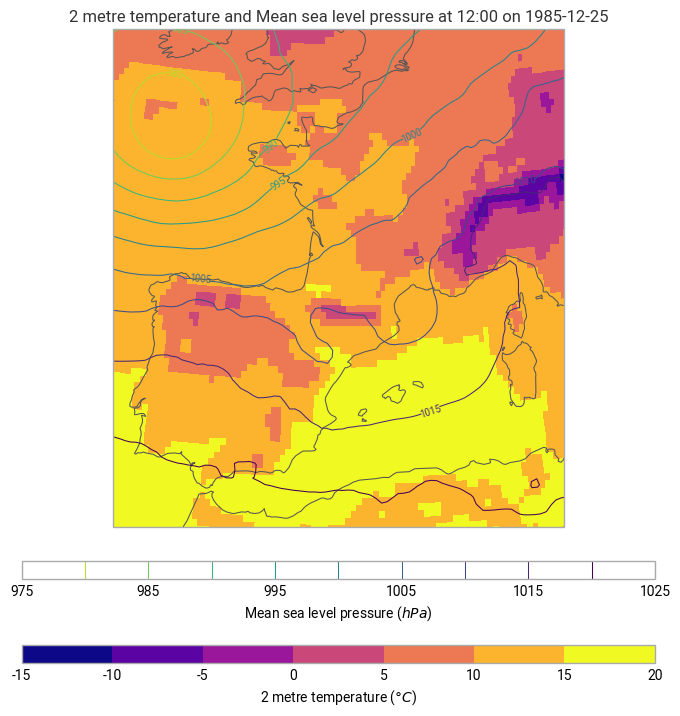

In [5]:
chart = ek.plots.Map(domain=["Spain", "France"])

chart.grid_cells(temperature, units="celsius")
chart.contour(pressure, units="hPa")

chart.legend()
chart.title()

chart.coastlines()

chart.show()

However, you can absolutely still use automatic styles with these methods if you want to! This can be particularly useful if, for example, you want to plot temperature data with the `grid_cells` method using the same style that's used with the default `contourf` style.

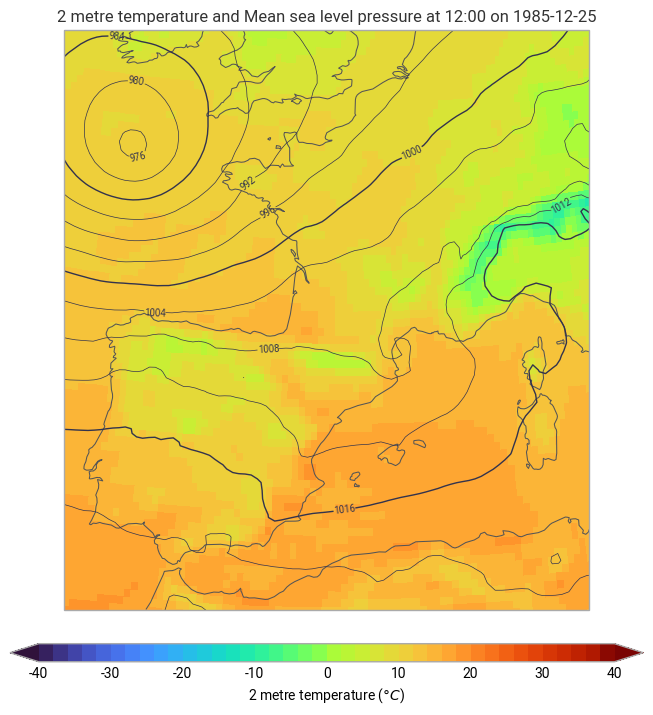

In [6]:
chart = ek.plots.Map(domain=["Spain", "France"])

chart.grid_cells(temperature, units="celsius", auto_style=True)
chart.contour(pressure, units="hPa", auto_style=True)

chart.legend()
chart.title()

chart.coastlines()

chart.show()

This works with any compatible plotting method - for example `point_cloud`:

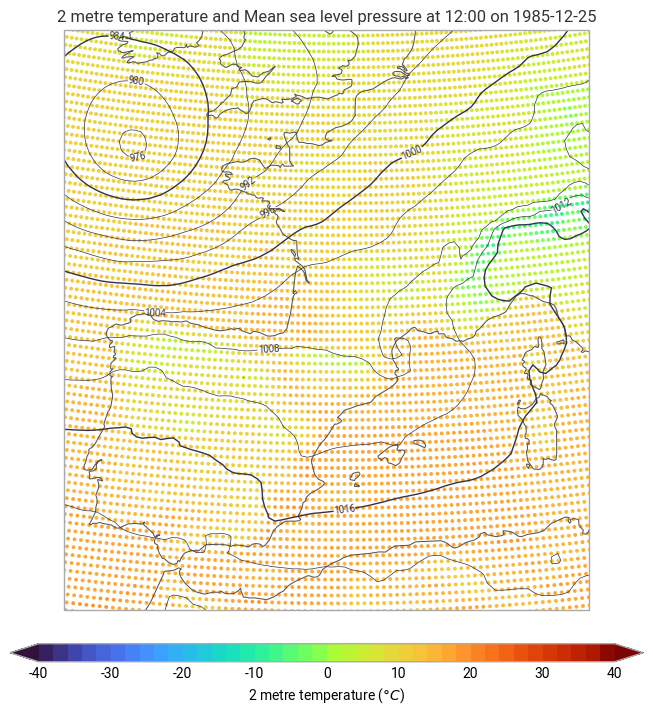

In [7]:
chart = ek.plots.Map(domain=["Spain", "France"])

chart.point_cloud(temperature, units="celsius", auto_style=True)
chart.contour(pressure, units="hPa", auto_style=True)

chart.legend()
chart.title()

chart.coastlines()

chart.show()